In [1]:
import matplotlib.pyplot as plt 

In [2]:
#data as rdd and centroids as numpy array
import numpy as np
import pandas as pd
import re
import sys 
from pyspark import SparkConf, SparkContext

from pyspark.sql import SQLContext
from scipy.spatial import distance
from pyspark.sql import Row

conf = SparkConf()
sc = SparkContext(conf = conf)


# def Euclidean(A,B):
#     return np.sqrt(sum((A-B)**2))
# def ManhattanDistance(A, B):
#     return sum([abs(a-b) for a,b in zip(A,B)])


In [3]:
c1 = np.loadtxt("c1.txt")
data = (sc.textFile("data.txt").map(lambda s: np.fromstring(s, dtype=np.float64, sep=" ")))
c2 = np.loadtxt("c2.txt")
# sampledata = (sc.textFile("sampledata.txt").map(lambda s: np.fromstring(s, dtype=np.float64, sep=" ")))


In [4]:
# dict = {}
# def firstCentroid(r):
# #     for r in range(13):
#     list = []
#     starttime = time.time()
#     min = 2147483647 #minimum distance 
#     index = 2147483647 #junk value

#     for i in range(10):
#         c = (Euclidean(data.take(4601)[r], c1.take(10)[i]))
#         if c < min:
#             index = i #chosen centroid index
#             min = c # Euclidean distance
#         if c == 0.00:
#             break
#     print('point, centroid index : data [{}], c[{}]'.format(r,index))
#     print ('Euclidean distance ',min)
#     endtime = time.time()
#     print ('runtime for data[{}],centroid[{}] is {}'.format(r,index,(endtime - starttime)))
#         print('\tend of iteration : ', r)
#     print("\nExiting the loop")
#     dict[index] = r
#     return (index,r) #returning centroid index, data point index
        

In [5]:
import time

# Driver Function

In [9]:
def kmeans(data,c1,iterations,euclidean_distance):
    listcost = []
    if(euclidean_distance==True):
        
#         starttime = time.time()
        for i in range(iterations):
            temp2 = data.map(lambda v : (v, np.array([distance.euclidean(v,c) for c in c1])))#returns datapoint, list of euclidean distances

                # type(c1)

                # temp2.take(19)[18]

            temp3 = temp2.map(lambda v: (np.argmin(v[1]),v[0])) 

                # # temp.groupByKey().map(lambda x : (x[0], list(x[1]))).collect()
                # grptemp = temp3.groupByKey().map(lambda u : (u[0],np.asarray(list(u[1]))))

            # temp3.take(19)[18]

                # temp3.count()

            cost = temp3.map(lambda v : (distance.euclidean(v[1],c1[v[0]])**2 )).sum()

            #     print('This is the value of cost after iteration', i)
            print('Iteration :', i+1 ,':',cost)
            listcost.append(cost)

            grptemp = temp3.groupByKey().map(lambda u : (u[0],np.asarray(list(u[1]))))

            # grptemp.take(2)[0]

                # # print np.mean(a, axis = 0) 
            newmeans = grptemp.map(lambda u: (u[0], np.mean(u[1], axis = 0)))

            # newmeans.collect()

            newIndexCentroid = newmeans.sortByKey()

            #     # newIndexCentroid.collect()
            #     i +=1
            newcentroids1 = newIndexCentroid.map(lambda u: u[1])
            c1 = np.array(newcentroids1.collect())
#         endtime = time.time()
    elif(euclidean_distance==False):
        #listcost = []
#         starttime = time.time()
        for i in range(iterations):
            temp2 = data.map(lambda v : (v, np.array([distance.cityblock(v,c) for c in c1])))

                # type(c1)

                # temp2.take(19)[18]

            temp3 = temp2.map(lambda v: (np.argmin(v[1]),v[0]))

                # # temp.groupByKey().map(lambda x : (x[0], list(x[1]))).collect()
                # grptemp = temp3.groupByKey().map(lambda u : (u[0],np.asarray(list(u[1]))))

            # temp3.take(19)[18]

                # temp3.count()

            cost = temp3.map(lambda v : (distance.cityblock(v[1],c1[v[0]]) )).sum()

            #     print('This is the value of cost after iteration', i)
            print('Iteration  ' , i+1 ,':',cost)
            listcost.append(cost)

            grptemp = temp3.groupByKey().map(lambda u : (u[0],np.asarray(list(u[1]))))

            # grptemp.take(2)[0]

                # # print np.mean(a, axis = 0) 
            newmeans = grptemp.map(lambda u: (u[0], np.mean(u[1], axis = 0)))

            # newmeans.collect()

            newIndexCentroid = newmeans.sortByKey()

            #     # newIndexCentroid.collect()
            #     i +=1
            newcentroids1 = newIndexCentroid.map(lambda u: u[1])
            c1 = np.array(newcentroids1.collect())
#         endtime = time.time()
    return listcost

In [10]:
# print(endtime - starttime)

# C1 Euclidean distance

In [11]:
listcost=kmeans(data,c1,20,True)

Iteration : 1 : 623660345.3064115
Iteration : 2 : 509862908.2975454
Iteration : 3 : 485480681.87200826
Iteration : 4 : 463997011.68501294
Iteration : 5 : 460969266.5729968
Iteration : 6 : 460537847.9827684
Iteration : 7 : 460313099.6535447
Iteration : 8 : 460003523.8894082
Iteration : 9 : 459570539.3177352
Iteration : 10 : 459021103.3422909
Iteration : 11 : 458490656.1919812
Iteration : 12 : 457944232.5879751
Iteration : 13 : 457558005.19867724
Iteration : 14 : 457290136.35230196
Iteration : 15 : 457050555.0595629
Iteration : 16 : 456892235.6153559
Iteration : 17 : 456703630.7370345
Iteration : 18 : 456404203.01897514
Iteration : 19 : 456177800.541994
Iteration : 20 : 455986871.02734685


In [12]:
listcost = [round(x) for x in listcost]
print(listcost)
xlist = []
for i in range(1,21):
    xlist.append(i)
print (xlist)

[623660345, 509862908, 485480682, 463997012, 460969267, 460537848, 460313100, 460003524, 459570539, 459021103, 458490656, 457944233, 457558005, 457290136, 457050555, 456892236, 456703631, 456404203, 456177801, 455986871]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


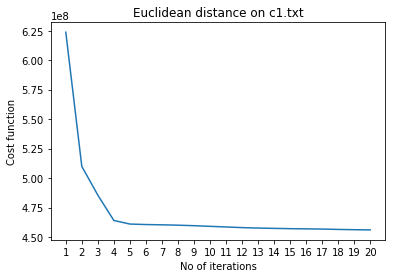

In [13]:
plt.plot(xlist, listcost) 
# naming the x axis 
plt.xlabel('No of iterations') 
# naming the y axis 
plt.ylabel('Cost function') 
plt.xticks(xlist)
# giving a title to my graph 
plt.title('Euclidean distance on c1.txt') 
# function to show the plot 
plt.show() 



# C2 Euclidean distance

In [14]:
listcost=kmeans(data,c2,20,True)

Iteration : 1 : 438747790.02791756
Iteration : 2 : 249803933.62600276
Iteration : 3 : 194494814.40631253
Iteration : 4 : 169804841.45154318
Iteration : 5 : 156295748.80627593
Iteration : 6 : 149094208.10896596
Iteration : 7 : 142508531.61961532
Iteration : 8 : 132303869.40652987
Iteration : 9 : 117170969.83719078
Iteration : 10 : 108547377.17857003
Iteration : 11 : 102237203.3179959
Iteration : 12 : 98278015.74975666
Iteration : 13 : 95630226.12177409
Iteration : 14 : 93793314.051193
Iteration : 15 : 92377131.96821065
Iteration : 16 : 91541606.25423889
Iteration : 17 : 91045573.83042456
Iteration : 18 : 90752240.10140806
Iteration : 19 : 90470170.18122731
Iteration : 20 : 90216416.1756313


In [16]:
listcost = [round(x) for x in listcost]
print(listcost)
xlist = []
for i in range(1,21):
    xlist.append(i)
print (xlist)

[438747790, 249803934, 194494814, 169804841, 156295749, 149094208, 142508532, 132303869, 117170970, 108547377, 102237203, 98278016, 95630226, 93793314, 92377132, 91541606, 91045574, 90752240, 90470170, 90216416]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


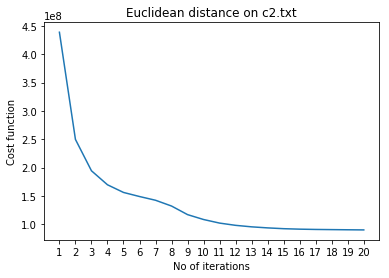

In [17]:
# Euclidean distance on c2.txt

plt.plot(xlist, listcost) 
# naming the x axis 
plt.xlabel('No of iterations') 
# naming the y axis 
plt.ylabel('Cost function') 
plt.xticks(xlist)
# giving a title to my graph 
plt.title('Euclidean distance on c2.txt') 
# function to show the plot 
plt.show() 



# Manhattan distance on C1

In [18]:
listcost=kmeans(data,c1,20,False)

Iteration   1 : 550117.1419999995
Iteration   2 : 464829.2684039448
Iteration   3 : 470934.15384668094
Iteration   4 : 483874.81628509343
Iteration   5 : 489234.23478834634
Iteration   6 : 487664.6926267904
Iteration   7 : 483718.6659285149
Iteration   8 : 475337.9476330566
Iteration   9 : 474871.9665496566
Iteration   10 : 457244.7897417528
Iteration   11 : 447493.1956040521
Iteration   12 : 450891.8358047706
Iteration   13 : 451232.57747569657
Iteration   14 : 451860.12588546576
Iteration   15 : 451567.2235891488
Iteration   16 : 452710.0520999437
Iteration   17 : 453078.22696184996
Iteration   18 : 450646.13556209404
Iteration   19 : 450419.9701134367
Iteration   20 : 449009.5903718855


In [19]:
listcost = [round(x) for x in listcost]
print(listcost)
xlist = []
for i in range(1,21):
    xlist.append(i)
print (xlist)

[550117.0, 464829.0, 470934.0, 483875.0, 489234.0, 487665.0, 483719.0, 475338.0, 474872.0, 457245.0, 447493.0, 450892.0, 451233.0, 451860.0, 451567.0, 452710.0, 453078.0, 450646.0, 450420.0, 449010.0]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


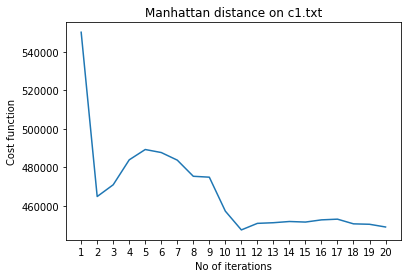

In [20]:
# Manhattan distance on c1.txt

plt.plot(xlist, listcost) 
# naming the x axis 
plt.xlabel('No of iterations') 
# naming the y axis 
plt.ylabel('Cost function') 
plt.xticks(xlist)
# giving a title to my graph 
plt.title('Manhattan distance on c1.txt') 
# function to show the plot 
plt.show() 



# Manhattan distance on C2

In [21]:
listcost=kmeans(data,c2,20,False)

Iteration   1 : 1433739.3099999954
Iteration   2 : 1084488.7769648773
Iteration   3 : 973431.7146620404
Iteration   4 : 895934.592563071
Iteration   5 : 865128.3352940815
Iteration   6 : 845846.647031348
Iteration   7 : 827219.5827561249
Iteration   8 : 803590.3456011118
Iteration   9 : 756039.5172761207
Iteration   10 : 717332.9025432297
Iteration   11 : 694587.9252526882
Iteration   12 : 684444.5019967904
Iteration   13 : 674574.7475478561
Iteration   14 : 667409.469916028
Iteration   15 : 663556.6278215044
Iteration   16 : 660162.7772287563
Iteration   17 : 656041.3222947121
Iteration   18 : 653036.7540731612
Iteration   19 : 651112.4262522729
Iteration   20 : 649689.0131843555


In [22]:
listcost = [round(x) for x in listcost]
print(listcost)
xlist = []
for i in range(1,21):
    xlist.append(i)
print (xlist)

[1433739.0, 1084489.0, 973432.0, 895935.0, 865128.0, 845847.0, 827220.0, 803590.0, 756040.0, 717333.0, 694588.0, 684445.0, 674575.0, 667409.0, 663557.0, 660163.0, 656041.0, 653037.0, 651112.0, 649689.0]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


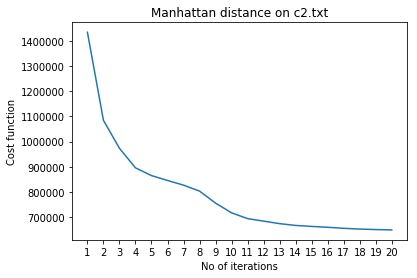

In [23]:
# Manhattan distance on c2.txt

plt.plot(xlist, listcost) 
# naming the x axis 
plt.xlabel('No of iterations') 
# naming the y axis 
plt.ylabel('Cost function') 
plt.xticks(xlist)
# giving a title to my graph 
plt.title('Manhattan distance on c2.txt') 
# function to show the plot 
plt.show() 
